In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd

from bo_functions import calc_y_exp
from bo_functions import ExactGPModel
from bo_functions import train_GP_model
from bo_functions import calc_GP_outputs
from bo_functions import calc_ei_basic
from bo_functions import calc_ei_basic_tot
from bo_functions import create_sse_point_data

from bo_plotters import plot_hyperparams
from bo_plotters import y_plotter_basic
from bo_plotters import stdev_plotter_basic
from bo_plotters import ei_plotter_basic

In [2]:
#Pull x data from CSV
Theta_True = np.array([1,-1])
noise_std = 0.1**2

exp_data_doc = "exp_data.csv"
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
# print(x)

In [3]:
#Pull training data from CSV
train_data_doc = "train_2_in_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_sse = torch.tensor(train_data[:,3])
print(train_sse)

tensor([113.0903,  71.7798,   2.5876, 207.4021,  43.4121,   4.6411, 104.9188,
        193.7594,  60.5787,  52.6786, 124.2697,  64.9917,  71.8940, 217.2584,
        344.4019,  15.3148, 255.9665,  29.8778, 245.9522], dtype=torch.float64)


In [4]:
#Define GP Testing space
#Define Testing Space
p=9
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]
print(theta_mesh)

[[[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]]

 [[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
  [-1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5]
  [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
  [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
  [ 0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
  [ 1.   1.   1.   1.   1.   1.   1.   1.   1. ]
  [ 1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5]
  [ 2.   2.   2.   2.   2.   2.   2.   2.   2. ]]]


The GP predicts that Theta1 = 1.0 and Theta2 = -1.5
The GP estimates the highest EI is at Theta =  [ 1.  -1.5]


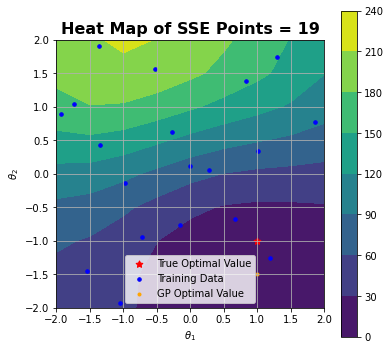

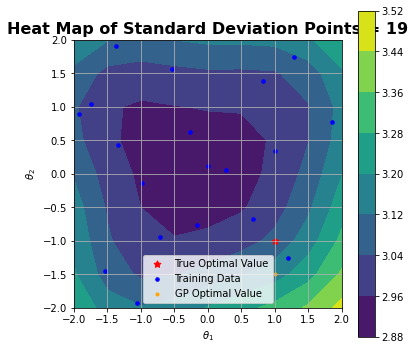

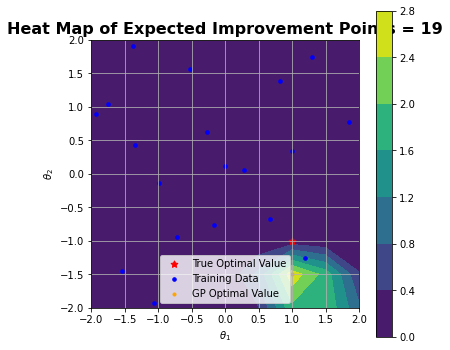

The GP predicts that Theta1 = 1.0 and Theta2 = -1.5
The GP estimates the highest EI is at Theta =  [ 1.  -1.5]


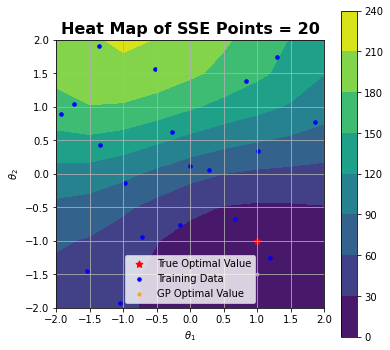

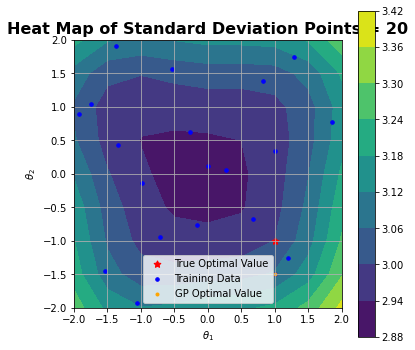

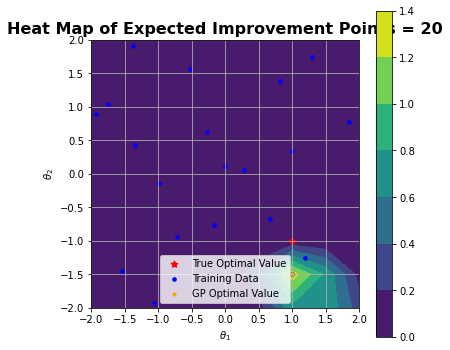

The GP predicts that Theta1 = 1.0 and Theta2 = -1.5
The GP estimates the highest EI is at Theta =  [ 1.  -1.5]


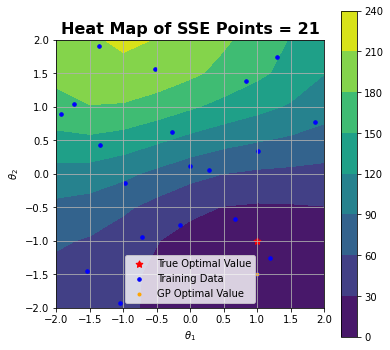

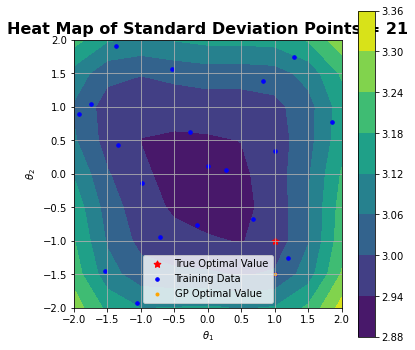

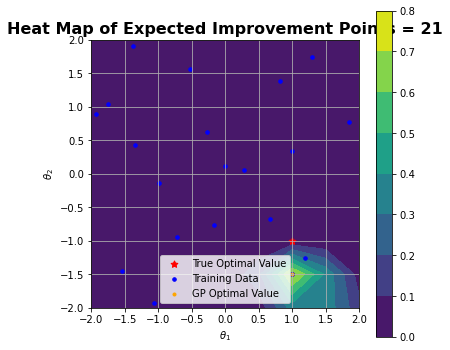

The GP predicts that Theta1 = 1.0 and Theta2 = -1.5
The GP estimates the highest EI is at Theta =  [ 1.  -1.5]


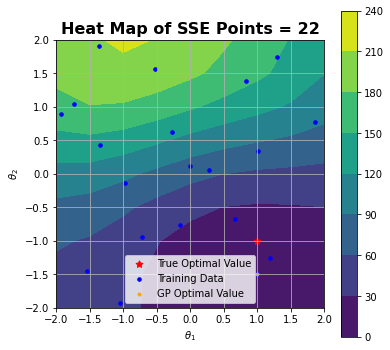

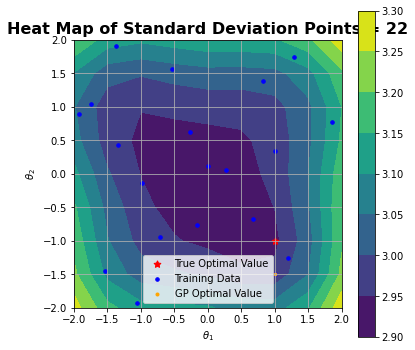

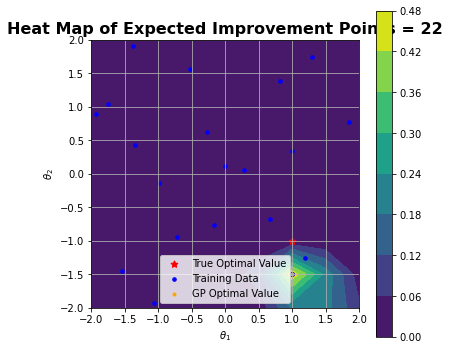

The GP predicts that Theta1 = 1.0 and Theta2 = -1.5
The GP estimates the highest EI is at Theta =  [ 1.  -1.5]


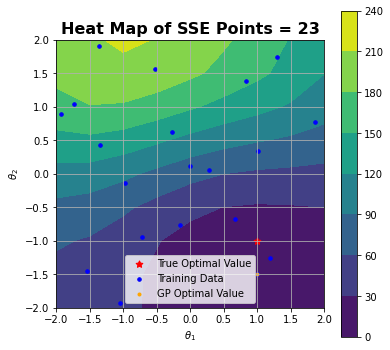

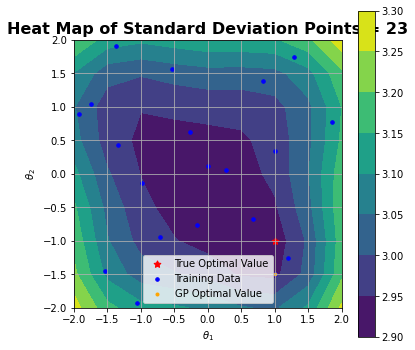

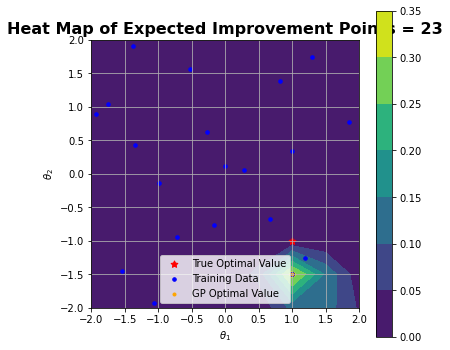

The GP predicts that Theta1 = 1.0 and Theta2 = -1.5
The GP estimates the highest EI is at Theta =  [ 1.  -1.5]


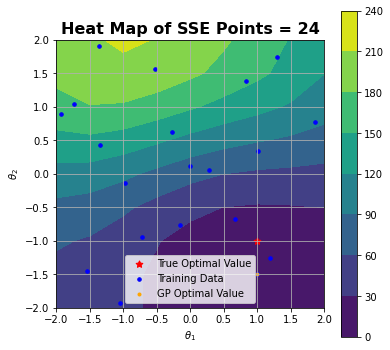

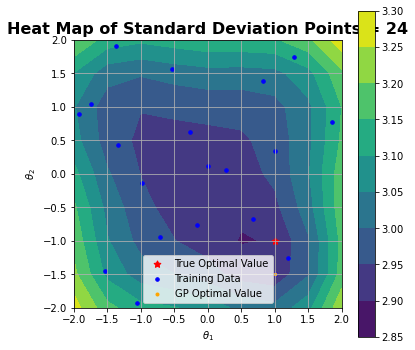

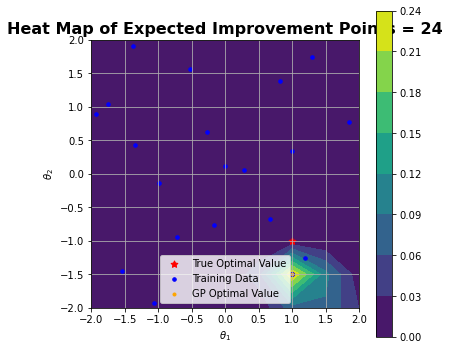

The GP predicts that Theta1 = 1.0 and Theta2 = -1.5
The GP estimates the highest EI is at Theta =  [ 1.  -1.5]


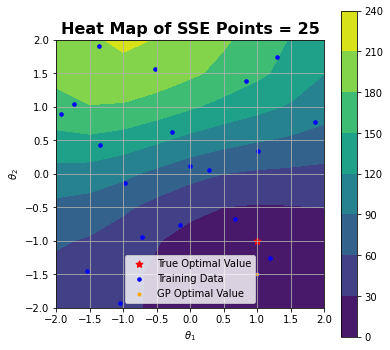

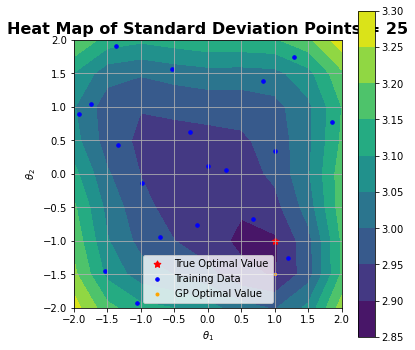

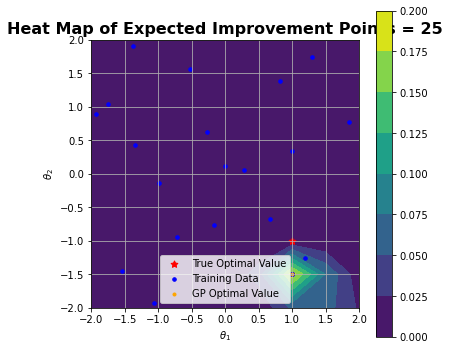

In [5]:
#Training the GP Model
iterations = 300
BO_iter =7
for i in range(BO_iter):
    if torch.is_tensor(train_T) != True:
        train_T = torch.from_numpy(train_T)
    if torch.is_tensor(train_sse) != True:
        train_sse = torch.from_numpy(train_sse)
    # initialize likelihood and model
    ##Assumes a homoskedastic noise model p(y | f) = f + noise
    likelihood = gpytorch.likelihoods.GaussianLikelihood()

    # We will use the simplest form of GP model, exact inference
    #Defines our model in terms of the class parameters in bo_functions
    model = ExactGPModel(train_T, train_sse, likelihood)
    train_GP = train_GP_model(model, likelihood, train_T, train_sse, iterations, verbose = False)
    
    noise_list = train_GP[0]
    lengthscale_list = train_GP[1]
    outputscale_list = train_GP[2]
    
    #Plot hyperparameters vs iteration
    noise_title = "Noise Hyperparameter"
    lengthscale_title = "Lengthscale Hyperparameter"
    outputscale_title = "Outputscale Hyperparameter"
#     plot_hyperparams(iterations, noise_list,noise_title)
#     plot_hyperparams(iterations, lengthscale_list,lengthscale_title)
#     plot_hyperparams(iterations, outputscale_list,outputscale_title)
    
    model.eval()
    #Puts likelihood in evaluation mode
    likelihood.eval()

    #Same point keeps being selected, should I remove that point by force?
    ei_components = calc_ei_basic_tot(p,theta_mesh, train_sse, model, likelihood)
    ei = ei_components[0]
    sse = ei_components[1]
    var = ei_components[2]
    stdev = ei_components[3]

    #Finds the index where sse is the smallest and finds which Theta combination corresponds to that value
    argmin = np.array(np.where(np.isclose(sse, np.amin(sse),atol=1e-10)==True))
    Theta_1_Opt = float(theta1_mesh[argmin[0],argmin[1]])
    Theta_2_Opt = float(theta2_mesh[argmin[0],argmin[1]])
    Theta_Opt_GP = np.array((Theta_1_Opt,Theta_2_Opt))
    print("The GP predicts that Theta1 =",Theta_Opt_GP[0],"and Theta2 =", Theta_Opt_GP[1])

    #calculates best theta value
    argmax = np.array(np.where(np.isclose(ei, np.amax(ei),atol=1e-10)==True))
    Theta_1_Best = float(theta1_mesh[argmax[0],argmax[1]])
    Theta_2_Best = float(theta2_mesh[argmax[0],argmax[1]])
    Theta_Best = np.array((Theta_1_Best,Theta_2_Best))
    print("The GP estimates the highest EI is at Theta = ",Theta_Best)
    
    #Make Plots
    sse_title = "SSE"
    Theta_True = np.array([1,-1])
    y_plotter_basic(theta_mesh, sse, Theta_True, Theta_Opt_GP, train_T,sse_title,plot_train=True)
    
    stdev_plotter_basic(theta_mesh, stdev,Theta_True, Theta_Opt_GP,train_T,plot_train=True)
    ei_plotter_basic(theta_mesh, ei, Theta_True, Theta_Opt_GP,train_T,plot_train=True)
    
    ##Append best values to training data 
    #Convert training data to numpy arrays to allow concatenation to work
    train_T = train_T.numpy() #(q x t)
    train_sse = train_sse.numpy() #(1 x t)

    #Call the expensive function and evaluate at Theta_Best
    sse_Best = create_sse_point_data(Theta_Best, Xexp, Yexp) #(1 x 1)
  
    #Add Theta_Best to train_p and y_best to train_y
    train_T = np.concatenate((train_T, [Theta_Best]), axis=0) #(q x t)
    train_sse = np.concatenate((train_sse, [sse_Best]),axis=0) #(1 x t)

In [6]:
# print(Theta_Best)
# print(train_T)